# Assignment 2 <br> Muhammad Bilal Naseer  <br>202046892

# Brief Description and Justification of Methods.
## Baseline Method
Linear regression is a fundamental statistical method used to model the relationship between a dependent variable and one or more independent variables. It assumes a linear relationship between the variables.It is often chosen as a baseline method due to its simplicity, interpretability, and ease of implementation. It provides a simple and straightforward way to recognize a baseline performance for comparison with more complex models. Additionally, linear regression can serve as a good starting point, especially when the relationship between the variables is assumed to be linear or when the data is relatively simple.
## SVR 
Random forest is an ensemble learning technique that builds multiple decision trees and combines their predictions to improve accuracy and reduce overfitting.
Random forest is chosen as an alternative model due to its ability to handle nonlinear relationships and interactions between variables. It is known for its robustness to noisy data and its capability to provide high prediction accuracy. By using a collection of decision trees, it can capture complex patterns in the data that linear regression might miss. 
## Random Forest Regression 
SVR is a variant of support vector machines (SVM) used for regression tasks. It works by finding the hyperplane that best fits the data, with a margin of tolerance to control the trade-off between simplicity of the model and its ability to fit the training data.
SVR is chosen as another alternative due to its effectiveness in capturing nonlinear relationships while also being less susceptible to overfitting compared to other nonlinear regression techniques. It can handle high-dimensional data and is particularly useful when dealing with datasets with complex structures or when there is a need for better generalization performance.

# CODE 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from prettytable import PrettyTable


# Reading the data from the files and storing them in the following dataframes.
df = pd.read_csv('A2data.tsv', sep='\t')
df.drop(columns=['InstanceID'], inplace=True)

In [2]:
# Split features and target variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Baseline regression model (simple linear regression)
baseline_model = LinearRegression()

# Cross-validation (e.g., 5-fold CV)
baseline_scores = cross_val_score(baseline_model, X, y, cv=5, scoring='neg_mean_squared_error')

baseline_model.fit(X, y)
y_pred_baseline = baseline_model.predict(X)

# Calculate RMSE
baseline_rmse = (-baseline_scores.mean()) ** 0.5
std_deviation = baseline_scores.std()

print("Baseline RMSE:", baseline_rmse)
print("Standard deviation of cross-validation scores:", std_deviation)


Baseline RMSE: 1.8954013098369606
Standard deviation of cross-validation scores: 1.0129369981988594


In [3]:
model1 = SVR()

model2 = RandomForestRegressor()

# Evaluate model performance
model1_scores = cross_val_score(model1, X, y, cv=5, scoring='neg_mean_squared_error')
model2_scores = cross_val_score(model2, X, y, cv=10, scoring='neg_mean_squared_error')

model1.fit(X, y)
y_pred_baseline = baseline_model.predict(X)

model2.fit(X, y)
y_pred_baseline = baseline_model.predict(X)

# Calculate RMSE for alternative models
model1_rmse = (-model1_scores.mean()) ** 0.5
model2_rmse = (-model2_scores.mean()) ** 0.5
std1 = model1_scores.std()
std2 = model2_scores.std()

print("SVR  RMSE:", model1_rmse,"\nRandom Forest Regressor RMSE:", model2_rmse)
print("\nSVR standard deviation", std1,"\nRandom Forest Regressor standard deviation",std2)

SVR  RMSE: 0.6503004935092906 
Random Forest Regressor RMSE: 0.6689641664170063

SVR standard deviation 0.15144721332376146 
Random Forest Regressor standard deviation 0.20005853193946088


# Data Visualisations

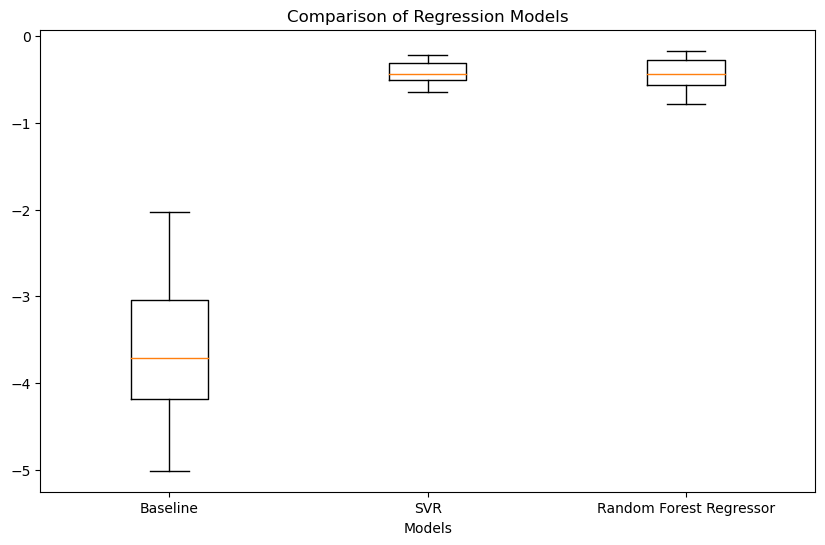

In [4]:
# Create a box plot to compare RMSE of all models
plt.figure(figsize=(10, 6))
plt.boxplot([baseline_scores, model1_scores, model2_scores], labels=['Baseline', 'SVR', 'Random Forest Regressor'])
plt.title('Comparison of Regression Models')
plt.xlabel('Models')
plt.show()


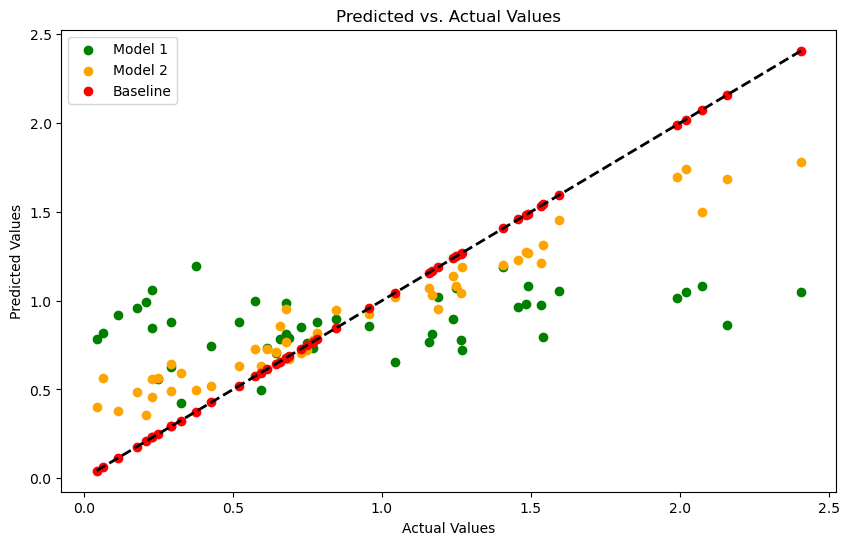

In [5]:
# Scatterplot of Predicted vs. Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y, model1.predict(X), color='green', label='Model 1')
plt.scatter(y, model2.predict(X), color='orange', label='Model 2')
plt.scatter(y, baseline_model.predict(X), color='red', label='Baseline')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line for reference
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.show()


In [6]:
# Create a PrettyTable object
table = PrettyTable()

# Add columns
table.field_names = ["Models ", "Average RMSE", "Std. Deviation"]

# Add rows
table.add_row(["Linear Regression", 1.90, "±1.01"])
table.add_row(["SVR Model", 0.65, "±0.15"])
table.add_row(["Random Forest Regressor", 0.66, "±0.19"])

# Print the table
print(table)

+-------------------------+--------------+----------------+
|         Models          | Average RMSE | Std. Deviation |
+-------------------------+--------------+----------------+
|    Linear Regression    |     1.9      |     ±1.01      |
|        SVR Model        |     0.65     |     ±0.15      |
| Random Forest Regressor |     0.66     |     ±0.19      |
+-------------------------+--------------+----------------+


## Conclusion
In conclusion, the performance of the models varied significantly in terms of predicting the target variable. The Linear Regression model yielded the highest average RMSE of 1.9 with a considerable standard deviation of ±1.01, indicating its inconsistency. On the other hand, both the SVR and Random Forest Regressor models outperformed the Linear Regression model, exhibiting lower average RMSE values of 0.65 and 0.66, respectively. Additionally, their tighter standard deviations (±0.15 for SVR and ±0.19 for Random Forest) suggest more stable predictions. These findings suggest that the SVR and Random Forest Regressor models are more suitable for the given task compared to Linear Regression. However, further analysis and experimentation may be necessary to determine the optimal model for practical application.

<img src="screenshot.png"/>

# Attributions 
In order to complete this assignment I used the following resources:<br>
https://scikit-learn.org/stable/supervised_learning.html#supervisedlearning <br>
https://www.kaggle.com/code/jnikhilsai/cross-validation-with-linearregression <br>
https://realpython.com/linear-regression-in-python/ <br>
Furthermore, me and my fellow classmates Sara Hamid, Basim Ali and Muneeb-ur-Rehman discussed our approaches for the assignment. I also used chatgpt to better understand different techniques and approaches and to optimize my code and make it more efficient.